# Telecom Churn Data Analysis and Visualization
#### Performed by Paakhi Maheshwari (AI / Analytics Intern)



##### Importing necessary libraries:

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading the relevant CSV files for further analysis:

In [122]:
churn=pd.read_csv("/Users/paakhim10/Desktop/JIO_Internship/archive/telecom_customer_churn.csv")
churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [109]:
population=pd.read_csv("/Users/paakhim10/Desktop/JIO_Internship/archive/telecom_zipcode_population.csv")
population.head()

,Zip Code,Population
0,90001,54492
1,90002,44586
2,90003,58198
3,90004,67852
4,90005,43019


##### Displaying the necessary information required:

In [110]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              7043 non-null   objec

In [111]:
churn.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,6361.000000,5517.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.420517,26.189958,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,14.200374,19.586585,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,2.000000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,13.050000,13.000000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,21.000000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,37.680000,30.000000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [112]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Zip Code    1671 non-null   int64
 1   Population  1671 non-null   int64
dtypes: int64(2)
memory usage: 26.2 KB


In [113]:
population.describe()

,Zip Code,Population
count,1671.000000,1671.000000
mean,93678.992220,20276.384201
std,1817.763591,20689.117300
min,90001.000000,11.000000
25%,92269.000000,1789.000000
50%,93664.000000,14239.000000
75%,95408.000000,32942.500000
max,96161.000000,105285.000000


In [146]:
churn.columns = churn.columns.str.replace(' ', '_')

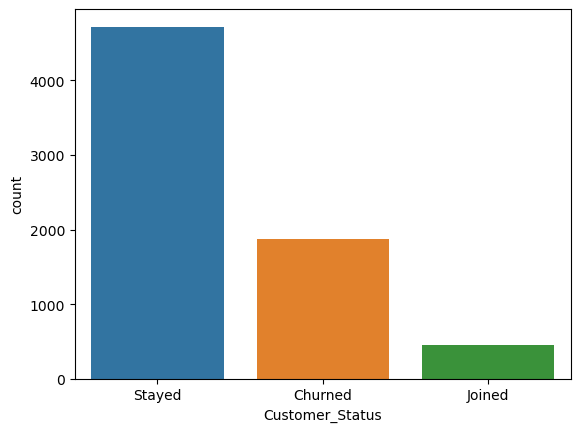

In [147]:
freq_status = sns.countplot(x="Customer_Status",data=churn)

### Why do customers churn? How can we improve customer retention?

To answer these questions, we will perform exploratory data analysis on the above datasets to identify patterns and factors contributing to the customer churn.
We will further visualise this data for easier interpretation.

##### Analyze churn rate by the demographic variables:

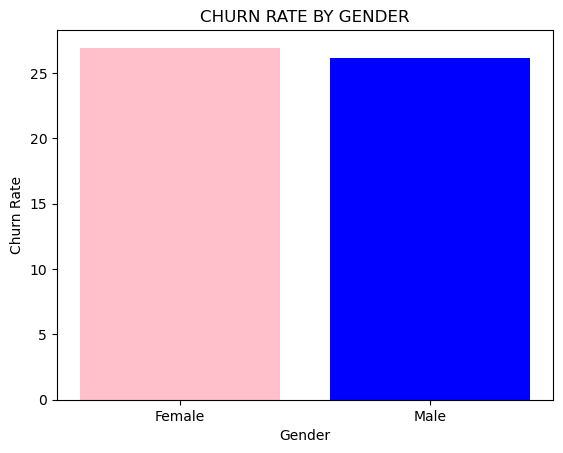

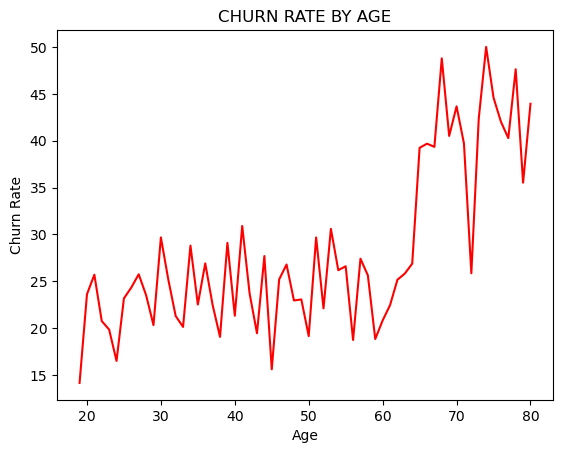

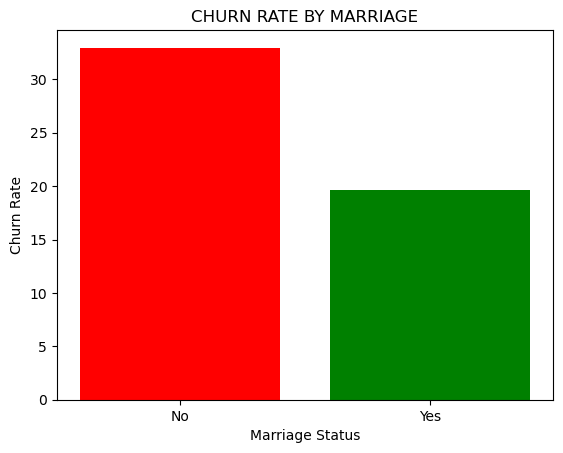

In [148]:
churn_by_gender = churn.groupby('Gender')['Customer_Status'].apply(lambda x: (x == 'Churned').mean()*100)
churn_by_age = churn.groupby('Age')['Customer_Status'].apply(lambda x: (x == 'Churned').mean() * 100)
churn_by_marriage = churn.groupby('Married')['Customer_Status'].apply(lambda x: (x == 'Churned').mean()*100)


# Visualize the churn_by_gender
plt.bar(churn_by_gender.index, churn_by_gender, color=["pink", "blue"])
plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY GENDER')
plt.show()

# Visualize the churn_by_age
plt.plot(churn_by_age.index, churn_by_age, color="red")
plt.xlabel('Age')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY AGE')
plt.show()

#Visualize the churn rate according to marriage status
plt.bar(churn_by_marriage.index, churn_by_marriage, color=["red", "green"])
plt.xlabel('Marriage Status')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY MARRIAGE')
plt.show()

##### By the above visualisation, we infer:
<br>1. Women are more likely to churn out than men.<br>2. The churn rate roughly increases with age.<br>3. Married people are less likely to churn out than unmarried people.

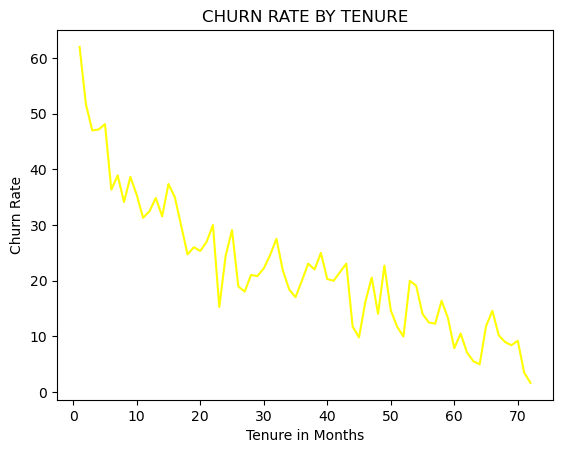

In [151]:
churn_by_tenure = churn.groupby('Tenure_in_Months')['Customer_Status'].apply(lambda x: (x == 'Churned').mean() * 100)
# Visualize the churn rate by customer tenure
plt.plot(churn_by_tenure.index, churn_by_tenure, color="yellow")
plt.xlabel('Tenure in Months')
plt.ylabel('Churn Rate')
plt.title('CHURN RATE BY TENURE')
plt.show()


#### Further, we see that as the customer tenure increases, the churn rate decreases.

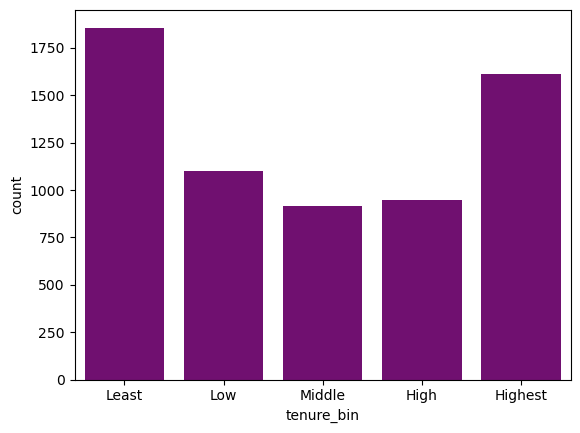

In [182]:
bins=np.linspace(min(churn["Tenure_in_Months"]), max(churn["Tenure_in_Months"]), 6)
grp_name=["Least", "Low", "Middle", "High", "Highest"]
churn["tenure_bin"]=pd.cut(churn["Tenure_in_Months"], bins, labels=grp_name)
freq_tenure = sns.countplot(x="tenure_bin",data=churn, color="purple")

#### We notice that while the churn rate decreases with the tenure length, the customers in the highest tenure rates and lowest tenure rates are more than those in the middle.

##### Now, let us filter the data as per the cities.

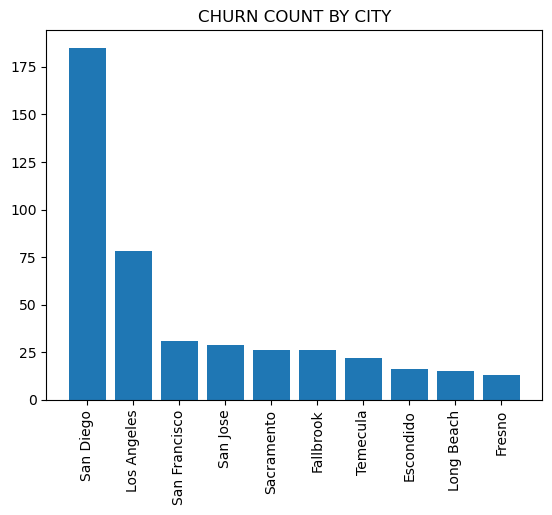

In [176]:
churn_by_city = churn.groupby('City')['Customer_Status'].apply(lambda x: (x == 'Churned').sum()).sort_values(ascending=False).head(10)
# Visualize the churn rate by customer city
plt.bar(churn_by_city.index, churn_by_city)
plt.title('CHURN COUNT BY CITY')
plt.xticks(rotation="vertical")
plt.show()

##### What is the reason for customers to churn out?

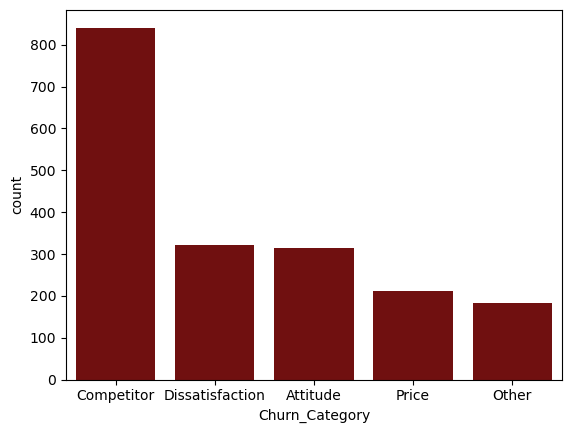

In [186]:
freq_reason=sns.countplot(x="Churn_Category", data=churn, order=churn["Churn_Category"].value_counts().index, color="maroon")

#### We infer from the above visualization that most customers leave due to better competitors.

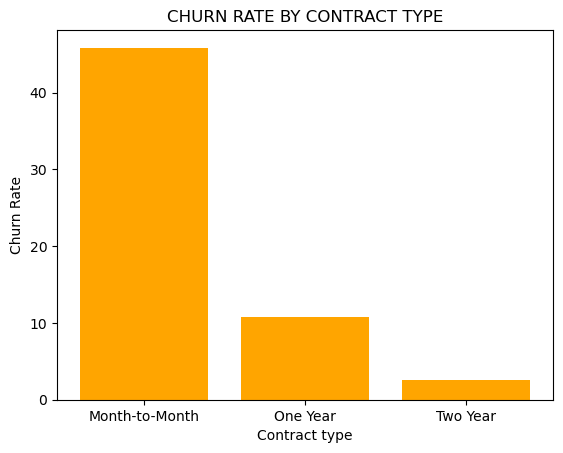

In [210]:
churn_by_contract = churn.groupby('Contract')['Customer_Status'].apply(lambda x: (x == 'Churned').mean()*100).sort_values(ascending=False)
# Visualize the churn rate by contract type
plt.bar(churn_by_contract.index, churn_by_contract, color="orange")
plt.ylabel("Churn Rate")
plt.xlabel("Contract type")
plt.title('CHURN RATE BY CONTRACT TYPE')
plt.show()

#### We can deduce from the above that customers tend to stay longer when they get longer contracts.

### Hence, we have visualised many of the possible constraints affect the churning rates for customers. 